In [117]:
from pybaseball import *
import pandas
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import seaborn as sns

%matplotlib inline

In [6]:
lookup = playerid_lookup('castillo', 'luis')
players = lookup[lookup['mlb_played_last'] == 2019]

Gathering player lookup table. This may take a moment.


In [23]:
players

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
10,castillo,luis,622491,castl003,castilu02,15689,2017.0,2019.0


In [71]:
is_castillo = (players['name_last'] == 'castillo') & (players['name_first'] == 'luis') 
castillo_stats = statcast_pitcher('2018-01-01', '2018-12-31', 622491)

Gathering Player Data


In [72]:
castillo_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,CH,2018-09-21,86.8,-2.2428,5.2266,Luis Castillo,592663,622491,walk,ball,...,0,0,0,0,0,0,0,0,Standard,Standard
1,CH,2018-09-21,87.8,-2.2452,5.2382,Luis Castillo,592663,622491,NaN,foul,...,0,0,0,0,0,0,0,0,Standard,Standard
2,FF,2018-09-21,98.4,-2.1390,5.6096,Luis Castillo,592663,622491,NaN,foul,...,0,0,0,0,0,0,0,0,Standard,Standard
3,FF,2018-09-21,97.7,-1.9879,5.5176,Luis Castillo,592663,622491,NaN,ball,...,0,0,0,0,0,0,0,0,Standard,Standard
4,FF,2018-09-21,98.3,-2.1977,5.6318,Luis Castillo,592663,622491,NaN,ball,...,0,0,0,0,0,0,0,0,Standard,Standard


In [34]:
castillo_stats['pitch_type'].value_counts(normalize=True)

FF    0.374098
CH    0.264069
FT    0.197330
SL    0.164502
Name: pitch_type, dtype: float64

In [37]:
pitching_data = pitching_stats(start_season=2018)
pitching_data.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
41,2018.0,Jacob deGrom,Mets,30.0,10.0,9.0,1.70,9.0,32.0,32.0,...,2.25,NaN,0.367,0.661,0.518,0.524,0.804,0.708,0.513,21.9
92,2018.0,Max Scherzer,Nationals,33.0,18.0,7.0,2.53,7.4,33.0,33.0,...,1.85,NaN,0.355,0.666,0.519,0.513,0.774,0.690,0.528,24.2
91,2018.0,Justin Verlander,Astros,35.0,16.0,9.0,2.52,6.7,34.0,34.0,...,0.48,NaN,0.336,0.656,0.509,0.557,0.785,0.716,0.541,27.0
57,2018.0,Chris Sale,Red Sox,29.0,12.0,4.0,2.11,6.2,27.0,27.0,...,2.20,NaN,0.363,0.602,0.481,0.507,0.769,0.669,0.493,22.7
133,2018.0,Gerrit Cole,Astros,27.0,15.0,5.0,2.88,6.0,32.0,32.0,...,0.53,NaN,0.315,0.650,0.493,0.502,0.805,0.714,0.532,23.7


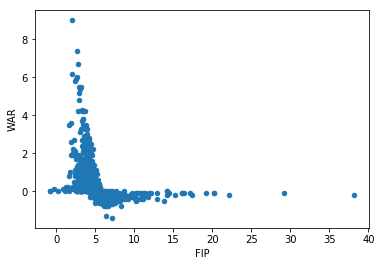

In [51]:
pitching_data.plot(x='FIP', y='WAR', kind='scatter')

In [82]:
hitting_data = statcast('2018-05-01', '2018-08-30')
contact = hitting_data.dropna(subset=['launch_angle', 'launch_speed'])
print(hitting_data.shape)

This is a large query, it may take a moment to complete
Completed sub-query from 2018-05-01 to 2018-05-06
Completed sub-query from 2018-05-07 to 2018-05-12
Completed sub-query from 2018-05-13 to 2018-05-18
Completed sub-query from 2018-05-19 to 2018-05-24
Completed sub-query from 2018-05-25 to 2018-05-30
Completed sub-query from 2018-05-31 to 2018-06-05
Completed sub-query from 2018-06-06 to 2018-06-11
Completed sub-query from 2018-06-12 to 2018-06-17
Completed sub-query from 2018-06-18 to 2018-06-23
Completed sub-query from 2018-06-24 to 2018-06-29
Completed sub-query from 2018-06-30 to 2018-07-05
Completed sub-query from 2018-07-06 to 2018-07-11
Completed sub-query from 2018-07-12 to 2018-07-17
Completed sub-query from 2018-07-18 to 2018-07-23
Completed sub-query from 2018-07-24 to 2018-07-29
Completed sub-query from 2018-07-30 to 2018-08-04
Completed sub-query from 2018-08-05 to 2018-08-10
Completed sub-query from 2018-08-11 to 2018-08-16
Completed sub-query from 2018-08-17 to 2018-

In [56]:
contact.columns

Index(['index', 'pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
     

In [60]:
contact.events.unique()

array(['field_out', 'double', nan, 'single', 'home_run', 'force_out',
       'grounded_into_double_play', 'triple', 'sac_fly', 'sac_bunt',
       'field_error', 'hit_by_pitch', 'double_play',
       'fielders_choice_out', 'fielders_choice', 'strikeout',
       'caught_stealing_home', 'catcher_interf',
       'pickoff_caught_stealing_2b', 'walk', 'pickoff_caught_stealing_3b',
       'sac_fly_double_play'], dtype=object)

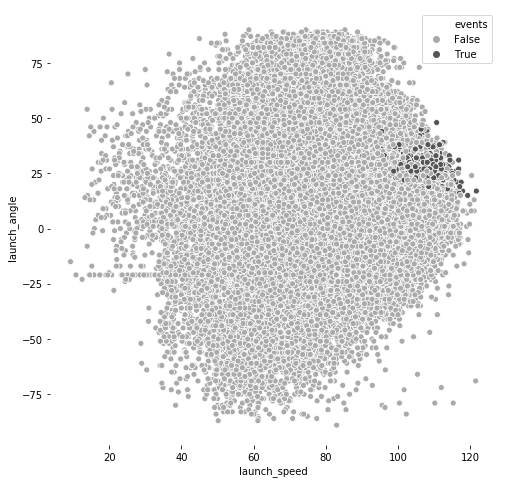

In [84]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(
    x=contact.launch_speed,
    y=contact.launch_angle,
    hue=contact.events == 'home_run',
    palette='binary',
    ax=ax
)

In [83]:
print(contact[contact.events == 'home_run'].launch_speed.mean())
print(contact[contact.events == 'home_run'].launch_angle.mean())

103.26668460710435
28.39128094725511


In [76]:
playerid_reverse_lookup([444432, 519317], key_type='mlbam')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,stanton,giancarlo,519317,stanm004,stantmi03,4949,2010.0,2019.0
1,trumbo,mark,444432,trumm001,trumbma01,6876,2010.0,2018.0


In [88]:
contact.hit_location.unique()

array([ 3.,  1., nan,  6.,  9.,  8.,  4.,  7.,  5.,  2.])

In [99]:
contact[contact.hit_location == 7.0][['hit_location', 'hit_distance_sc', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z']].head()

,hit_location,hit_distance_sc,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,plate_x,plate_z
62,7.0,46.0,8.0759,-136.2221,-5.8385,-8.2891,26.1846,-16.4146,-0.5443,1.1993,-0.4641,2.4746
138,7.0,249.0,-7.3399,-123.2743,-2.1762,0.6713,23.2257,-22.3185,-0.0700,0.9506,-0.4633,2.9519
153,7.0,290.0,6.1059,-138.9216,-5.6077,-17.7737,32.8289,-19.2351,-1.2889,0.9366,-0.0284,2.6318
184,7.0,336.0,7.3417,-138.2589,-7.7729,-18.1846,29.8258,-17.9327,-1.3251,1.0225,0.4837,1.9334
249,7.0,204.0,4.1579,-142.3104,-8.6245,-9.1001,30.4496,-11.8665,-0.6153,1.4010,-0.3097,2.1659


In [110]:
stanton_stats = statcast_batter('2018-01-01', '2018-12-31', 519317)
stanton_contact = stanton_stats.dropna(subset=['launch_angle', 'launch_speed'])
stanton_stats.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,KC,2018-10-09,87.3,-2.7811,5.2092,Giancarlo Stanton,519317,518886,strikeout,swinging_strike,...,1,4,1,4,4,1,1,4,Standard,Standard
1,FF,2018-10-09,97.7,-2.9917,5.0162,Giancarlo Stanton,519317,518886,NaN,ball,...,1,4,1,4,4,1,1,4,Standard,Standard
2,KC,2018-10-09,87.3,-2.8764,5.0936,Giancarlo Stanton,519317,518886,NaN,swinging_strike_blocked,...,1,4,1,4,4,1,1,4,Standard,Standard
3,KC,2018-10-09,86.0,-2.8605,5.2594,Giancarlo Stanton,519317,518886,NaN,called_strike,...,1,4,1,4,4,1,1,4,Standard,Standard
4,CU,2018-10-09,87.1,-1.8391,6.2848,Giancarlo Stanton,519317,598264,field_out,hit_into_play,...,1,4,1,4,4,1,1,4,Strategic,Standard


In [150]:
votto_stats = statcast_batter('2017-01-01', '2017-12-31', 458015)
votto_contact = votto_stats.dropna(subset=['launch_angle', 'launch_speed'])
votto_contact.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2017-10-01,94.3,-2.1929,6.2183,Joey Votto,458015,570240,double,hit_into_play_no_out,...,0,3,3,0,3,0,3,0,Standard,Standard
2,FF,2017-10-01,93.5,-2.3347,6.3821,Joey Votto,458015,570240,NaN,foul,...,0,3,3,0,3,0,3,0,Standard,Standard
6,FF,2017-10-01,88.2,1.9195,6.0254,Joey Votto,458015,642239,field_out,hit_into_play,...,0,2,2,0,2,0,2,0,Standard,Standard
7,FT,2017-10-01,92.1,-1.4912,5.6596,Joey Votto,458015,407793,double,hit_into_play_no_out,...,0,0,0,0,0,0,0,0,Standard,Standard
9,FF,2017-10-01,92.1,3.0314,6.3150,Joey Votto,458015,543557,field_out,hit_into_play,...,0,0,0,0,0,0,0,0,Strategic,Standard


In [106]:
stanton_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

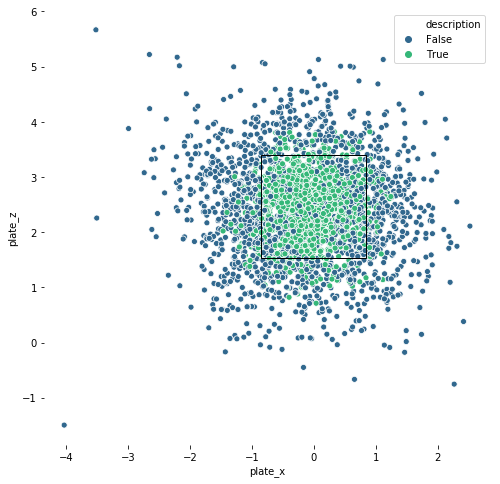

In [157]:
zone_bottom_left_corner = (-0.85, votto_contact.sz_bot.mean())
zone_height = votto_contact.sz_top.mean() - votto_contact.sz_bot.mean()
zone_width = 1.7

is_swing = votto_stats.description.isin(['hit_into_play_no_out', 'foul',
       'hit_into_play', 'swinging_strike',
       'hit_into_play_score', 'foul_tip',
       'swinging_strike_blocked'])

fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(
    x=votto_stats.plate_x,
    y=votto_stats.plate_z,
    hue=is_swing,
    palette='viridis',
    ax=ax
)

strike_zone = patches.Rectangle(
    xy=zone_bottom_left_corner,
    width=zone_width,
    height=zone_height,
    fill=False
)

ax.add_patch(strike_zone)

In [154]:
votto_stats.description.unique()

array(['hit_into_play_no_out', 'ball', 'foul', 'called_strike',
       'hit_into_play', 'swinging_strike', 'hit_by_pitch',
       'hit_into_play_score', 'blocked_ball', 'foul_tip', 'pitchout',
       'swinging_strike_blocked'], dtype=object)